In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

### 5

In [3]:
D5L = pd.read_csv('./magazine/final/D5L_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [4]:
D5L['ADFN_2'] = D5L['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [5]:
D5L['ADFN_2']

0      [빈티지, 패션, 좋, 느, 좋, 당시, 사랑, 사랑, 나의, 물건, 새롭, 사랑,...
1      [DIOR, 론, DIOR, TALK, 예술, 문화, 사회, 아우르, 주제, 화두,...
2      [나이, DIOR, 소문, 나이키, DIOR, COLLABORATION, 드러내, ...
3      [자유, 분방, 보헤미안, 마음, 훔치, 이브, 인기, DIOR, 반, 다나, 스타...
4      [세계, 무대, 서, 코리아, 모델, 이름, 김설희, 신호탄, 런던, 밀, 리아, ...
                             ...                        
544    [밀란, 패션위크, 참석, 차, 출국, 리사, 공항, BLACKPINK, 리사, 오...
545    [리사, 패션, 브랜드, 탄생, 할, 보인다, YG, 엔터테인먼트, BLACKPIN...
546    [서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ...
547    [내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ...
548    [한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,...
Name: ADFN_2, Length: 549, dtype: object

### top50 리스트 생성

In [6]:
top500 = pd.read_csv('./D5L_top500.csv', sep='|', encoding = 'utf-8')

In [7]:
top500

,word,count
0,리사,3570
1,DIOR,952
2,예쁘다,676
3,귀엽다,543
4,춤,483
...,...,...
495,꿍꿍,26
496,지난,26
497,기도,25
498,쓰,25


In [8]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['리사', 'DIOR', '예쁘다', '귀엽다', '춤', '패션', '사랑', '컬렉션', '랩', '한국', '영어', '노래', '무대', '멤버', '얼굴', '브랜드', '잘', '매력', '룩', '아이돌', '중국', '스타일', '컬러', '태국', '드레스', '쇼', '느낌', '한국어', '모델', '블랙']


In [9]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['리사', 'DIOR', '예쁘다', '귀엽다', '춤', '패션', '사랑', '컬렉션', '랩', '한국', '영어', '노래', '무대', '멤버', '얼굴', '브랜드', '잘', '매력', '룩', '아이돌', '중국', '스타일', '컬러', '태국', '드레스', '쇼', '느낌', '한국어', '모델', '블랙', '한국인', '표정', '비율', '여성', '백', '멋있다', '전소민', '시즌', '공유', '실력', '눈', '디자이너', '재킷', '티', '외국인', '여자', '팬', '모습', '파리', '하우스']


### top100

In [10]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['리사', 'DIOR', '예쁘다', '귀엽다', '춤', '패션', '사랑', '컬렉션', '랩', '한국', '영어', '노래', '무대', '멤버', '얼굴', '브랜드', '잘', '매력', '룩', '아이돌', '중국', '스타일', '컬러', '태국', '드레스', '쇼', '느낌', '한국어', '모델', '블랙', '한국인', '표정', '비율', '여성', '백', '멋있다', '전소민', '시즌', '공유', '실력', '눈', '디자이너', '재킷', '티', '외국인', '여자', '팬', '모습', '파리', '하우스', '디렉터', '장식', '인기', '머리', '세계', '최고', '봄', 'MARIA', '아이템', '발음', '걸', 'SADDLE', '데님', '양세찬', '팬츠', '스타', '처음', '연습생', 'DESIGN', '데뷔', '호랑이', '스커트', '그룹', '한편', '참석', '제일', '선택', '예능', '영감', '여름', '완성', '옷', '화이트', '미국', '프로', '가장', '라인', '포인트', '다리', '소재', 'CELINE', '분위기', '레드', '활동', '앞머리', '공개', '인형', '좋은', '단발', '걸그룹']


In [11]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['리사', 'DIOR', '예쁘다', '귀엽다', '춤', '패션', '사랑', '컬렉션', '랩', '한국', '영어', '노래', '무대', '멤버', '얼굴', '브랜드', '잘', '매력', '룩', '아이돌', '중국', '스타일', '컬러', '태국', '드레스', '쇼', '느낌', '한국어', '모델', '블랙', '한국인', '표정', '비율', '여성', '백', '멋있다', '전소민', '시즌', '공유', '실력', '눈', '디자이너', '재킷', '티', '외국인', '여자', '팬', '모습', '파리', '하우스', '디렉터', '장식', '인기', '머리', '세계', '최고', '봄', 'MARIA', '아이템', '발음', '걸', 'SADDLE', '데님', '양세찬', '팬츠', '스타', '처음', '연습생', 'DESIGN', '데뷔', '호랑이', '스커트', '그룹', '한편', '참석', '제일', '선택', '예능', '영감', '여름', '완성', '옷', '화이트', '미국', '프로', '가장', '라인', '포인트', '다리', '소재', 'CELINE', '분위기', '레드', '활동', '앞머리', '공개', '인형', '좋은', '단발', '걸그룹', '태국인', '외국', '노력', '코트', '카리스마', '좋', '반', 'CREATIVE', 'CHRISTIAN', 'YG', '핑크', 'COUTURE', '대박', '좋다', '아티스트', '짱', '톱', '화보', '아는', '쌤', '메이크업', '일본', '한국말', '택시', '티셔츠', '자체', '스타일링', '사실', '해외', '간지', '선생님', '나도', 'HOMME', '촬영', '우리나라', '럭셔리', 'JONES', '프랑스', '컴백', '목소리', '착용', '배', '명', '썸네일', '가을', '로고', '프라다', '협업', '점', '형', '탑', '음악', '좋아요', '매치', '이미지',

In [12]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['리사', 'DIOR', '예쁘다', '귀엽다', '춤', '패션', '사랑', '컬렉션', '랩', '한국', '영어', '노래', '무대', '멤버', '얼굴', '브랜드', '잘', '매력', '룩', '아이돌', '중국', '스타일', '컬러', '태국', '드레스', '쇼', '느낌', '한국어', '모델', '블랙', '한국인', '표정', '비율', '여성', '백', '멋있다', '전소민', '시즌', '공유', '실력', '눈', '디자이너', '재킷', '티', '외국인', '여자', '팬', '모습', '파리', '하우스', '디렉터', '장식', '인기', '머리', '세계', '최고', '봄', 'MARIA', '아이템', '발음', '걸', 'SADDLE', '데님', '양세찬', '팬츠', '스타', '처음', '연습생', 'DESIGN', '데뷔', '호랑이', '스커트', '그룹', '한편', '참석', '제일', '선택', '예능', '영감', '여름', '완성', '옷', '화이트', '미국', '프로', '가장', '라인', '포인트', '다리', '소재', 'CELINE', '분위기', '레드', '활동', '앞머리', '공개', '인형', '좋은', '단발', '걸그룹', '태국인', '외국', '노력', '코트', '카리스마', '좋', '반', 'CREATIVE', 'CHRISTIAN', 'YG', '핑크', 'COUTURE', '대박', '좋다', '아티스트', '짱', '톱', '화보', '아는', '쌤', '메이크업', '일본', '한국말', '택시', '티셔츠', '자체', '스타일링', '사실', '해외', '간지', '선생님', '나도', 'HOMME', '촬영', '우리나라', '럭셔리', 'JONES', '프랑스', '컴백', '목소리', '착용', '배', '명', '썸네일', '가을', '로고', '프라다', '협업', '점', '형', '탑', '음악', '좋아요', '매치', '이미지',

In [13]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['리사', 'DIOR', '예쁘다', '귀엽다', '춤', '패션', '사랑', '컬렉션', '랩', '한국', '영어', '노래', '무대', '멤버', '얼굴', '브랜드', '잘', '매력', '룩', '아이돌', '중국', '스타일', '컬러', '태국', '드레스', '쇼', '느낌', '한국어', '모델', '블랙', '한국인', '표정', '비율', '여성', '백', '멋있다', '전소민', '시즌', '공유', '실력', '눈', '디자이너', '재킷', '티', '외국인', '여자', '팬', '모습', '파리', '하우스', '디렉터', '장식', '인기', '머리', '세계', '최고', '봄', 'MARIA', '아이템', '발음', '걸', 'SADDLE', '데님', '양세찬', '팬츠', '스타', '처음', '연습생', 'DESIGN', '데뷔', '호랑이', '스커트', '그룹', '한편', '참석', '제일', '선택', '예능', '영감', '여름', '완성', '옷', '화이트', '미국', '프로', '가장', '라인', '포인트', '다리', '소재', 'CELINE']


### top50만 남기기

In [14]:
len(D5L)

549

In [15]:
top30_word = []
for i in range(len(D5L)):
    w=[]
    for word in D5L.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [16]:
top50_word = []
for i in range(len(D5L)):
    w=[]
    for word in D5L.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [17]:
top100_word = []
for i in range(len(D5L)):
    w=[]
    for word in D5L.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [18]:
top200_word = []
for i in range(len(D5L)):
    w=[]
    for word in D5L.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [19]:
top300_word = []
for i in range(len(D5L)):
    w=[]
    for word in D5L.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [20]:
top500_word = []
for i in range(len(D5L)):
    w=[]
    for word in D5L.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [21]:
D5L

,magazine,brand,title,word,ADFN,ADFN_2
0,A,D,빈티지 쇼핑의 시대,"['그러니 빈티지 패션은, 어쩌면 나도 좋고 너도 좋은 일이다. 당시 사랑했던, 지...","['빈티지', '패션', '좋', '느', '좋', '당시', '사랑', '사랑',...","[빈티지, 패션, 좋, 느, 좋, 당시, 사랑, 사랑, 나의, 물건, 새롭, 사랑,..."
1,A,D,집에서 듣기 좋은 패션 팟캐스트 세 가지,"[' 디올이 최근에 론칭한 <Dior Talk>는 예술, 문화, 사회를 아우르는 ...","['DIOR', '론', 'DIOR', 'TALK', '예술', '문화', '사회'...","[DIOR, 론, DIOR, TALK, 예술, 문화, 사회, 아우르, 주제, 화두,..."
2,A,D,소장욕구 샘솟는 환상의 컬래버레이션 스니커즈 5,"[' 나이키×디올', '소문만 무성하던 나이키와 디올의 컬래버레이션이 모습을 드러...","['나이', 'DIOR', '소문', '나이키', 'DIOR', 'COLLABORA...","[나이, DIOR, 소문, 나이키, DIOR, COLLABORATION, 드러내, ..."
3,A,D,따뜻한 나라로 여행 시 참고하면 좋을 리조트 트렌드 키워드,['자유분방한 보헤미안들의 마음을 훔칠 1970년대 바이브도 인기다. 디올의 반다나...,"['자유', '분방', '보헤미안', '마음', '훔치', '이브', '인기', '...","[자유, 분방, 보헤미안, 마음, 훔치, 이브, 인기, DIOR, 반, 다나, 스타..."
4,A,D,새로운 시즌 4대 패션위크에서 생긴 일,['세계 무대에 서는 코리아 모델 이름에 김설희가 등장했다. 그 첫 신호탄은 바로 ...,"['세계', '무대', '서', '코리아', '모델', '이름', '김설희', '신...","[세계, 무대, 서, 코리아, 모델, 이름, 김설희, 신호탄, 런던, 밀, 리아, ..."
...,...,...,...,...,...,...
544,W,L,밀라노로 떠난 리사,"밀란 패션위크 참석차 출국한 리사의 공항 룩., BLACKPINK 리사가 오늘 2월...","['밀란', '패션위크', '참석', '차', '출국', '리사', '공항', 'B...","[밀란, 패션위크, 참석, 차, 출국, 리사, 공항, BLACKPINK, 리사, 오..."
545,W,L,리사의 새로운 행보,", , 리사의 패션 브랜드가 탄생할 것으로 보인다. YG엔터테인먼트가 2019년 ...","['리사', '패션', '브랜드', '탄생', '할', '보인다', 'YG', '엔...","[리사, 패션, 브랜드, 탄생, 할, 보인다, YG, 엔터테인먼트, BLACKPIN..."
546,W,L,"블랙핑크X세레나 고메즈 영상통화, 협업 티징","서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...","['서로', '팬임', '인증', '두', '스타', 'BLACKPINK', '세레...","[서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ..."
547,W,L,블랙핑크가 아이스크림 셀카를 올린 이유는?,"내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...","['내셔널', '아이스크림', '데이', '기념', 'BLACKPINK', '귀여운...","[내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ..."


### item 남기기

In [22]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [23]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [24]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [25]:
# len(top100_not_item_word)

In [26]:
# top100_not_item_word[1]

In [27]:
# top50_word

In [27]:
len(top50_word)

2110

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [22]:
# 어프라이어리(Apriori)
from apyori import apriori

In [23]:
top30_word[0]

['패션', '사랑', '사랑', '사랑', '패션', '컬렉션', 'DIOR']

In [31]:
###### 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.06))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
148,"(DIOR, 패션)",0.191257,"[((), (DIOR, 패션), 0.1912568306010929, 1.0), ((...",2
145,"(컬렉션, DIOR)",0.185792,"[((), (컬렉션, DIOR), 0.18579234972677597, 1.0), ...",2
188,"(리사, 패션)",0.145719,"[((), (리사, 패션), 0.14571948998178508, 1.0), ((리...",2
200,"(브랜드, 패션)",0.131148,"[((), (브랜드, 패션), 0.13114754098360656, 1.0), ((...",2
219,"(컬렉션, 패션)",0.131148,"[((), (컬렉션, 패션), 0.13114754098360656, 1.0), ((...",2
130,"(DIOR, 브랜드)",0.123862,"[((), (DIOR, 브랜드), 0.12386156648451731, 1.0), ...",2
123,"(드레스, DIOR)",0.122040,"[((), (드레스, DIOR), 0.122040072859745, 1.0), ((...",2
146,"(DIOR, 티)",0.118397,"[((), (DIOR, 티), 0.11839708561020036, 1.0), ((...",2
136,"(스타일, DIOR)",0.118397,"[((), (스타일, DIOR), 0.11839708561020036, 1.0), ...",2
149,"(DIOR, 하우스)",0.118397,"[((), (DIOR, 하우스), 0.11839708561020036, 1.0), ...",2


In [32]:
idx = []
for i in df.index:
    if '리사' in df.loc[i, 'items']:
        idx.append(i)

In [33]:
df.loc[idx]

,items,support,ordered_statistics,length
188,"(리사, 패션)",0.145719,"[((), (리사, 패션), 0.14571948998178508, 1.0), ((리...",2
171,"(리사, 멤버)",0.109290,"[((), (리사, 멤버), 0.1092896174863388, 1.0), ((리사...",2
169,"(매력, 리사)",0.107468,"[((), (매력, 리사), 0.10746812386156648, 1.0), ((리...",2
175,"(블랙, 리사)",0.091075,"[((), (블랙, 리사), 0.09107468123861566, 1.0), ((리...",2
186,"(컬러, 리사)",0.087432,"[((), (컬러, 리사), 0.08743169398907104, 1.0), ((리...",2
184,"(잘, 리사)",0.085610,"[((), (리사, 잘), 0.08561020036429873, 1.0), ((리사...",2
192,"(리사, 한편)",0.083789,"[((), (리사, 한편), 0.08378870673952642, 1.0), ((리...",2
164,"(룩, 리사)",0.083789,"[((), (룩, 리사), 0.08378870673952642, 1.0), ((룩)...",2
190,"(리사, 포인트)",0.083789,"[((), (리사, 포인트), 0.08378870673952642, 1.0), ((...",2
176,"(사랑, 리사)",0.081967,"[((), (사랑, 리사), 0.08196721311475409, 1.0), ((리...",2


### networkx 그래프 정의

In [34]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [35]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [36]:
pos = nx.spring_layout(G)

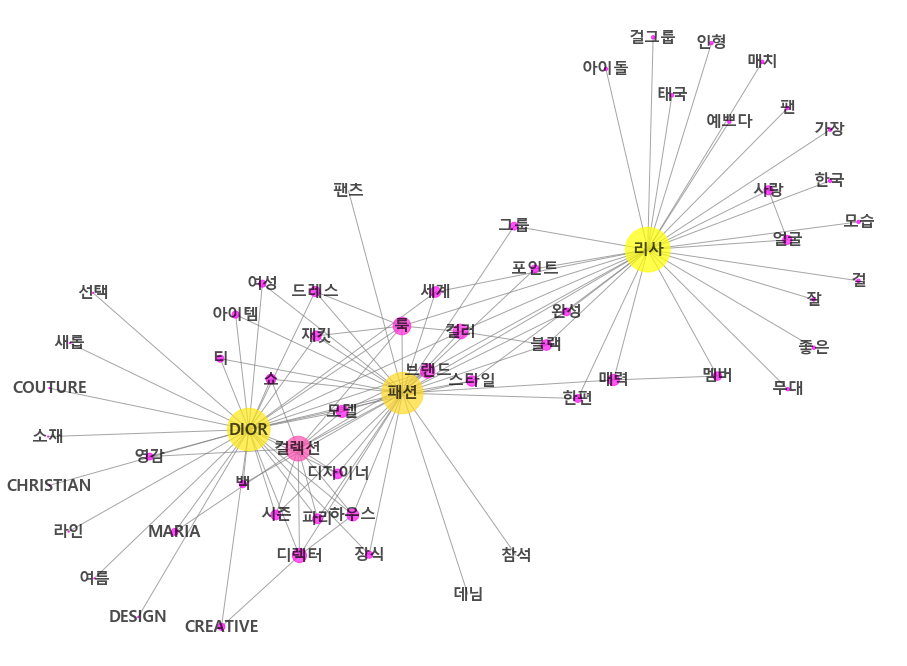

In [37]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.spring,
                font_color = 'black', font_weight = 'bold')

plt.savefig('./nt_D5L_top500_mins06-b.png', bbox_inches = 'tight')
plt.show()
